# PCA Project

By using COVID-19 data to apply PCA:

## Import Packages

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score, v_measure_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

## Data Import

In [90]:
covid = pd.read_csv('country_wise_latest.csv')
covid.head()

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [91]:
covid_data = covid.drop(['Country/Region', 'WHO Region'], axis=1)
covid_data.head()

   Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  \
0      36263    1269      25198    9796        106          10             18   
1       4880     144       2745    1991        117           6             63   
2      27973    1163      18837    7973        616           8            749   
3        907      52        803      52         10           0              0   
4        950      41        242     667         18           1              0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.50                  69.49                    5.04   
1                2.95                  56.25                    5.25   
2                4.16                  67.34                    6.17   
3                5.73                  88.53                    6.48   
4                4.32                  25.47                   16.94   

   Confirmed last week  1 week change  1 week % increase  
0                3552

In [92]:

#covid_data.loc[covid_data["Deaths / 100 Recovered"] ]
inf_data =covid_data["Deaths / 100 Recovered"].iloc[covid_data["Deaths / 100 Recovered"].values == np.inf]

covid_data = covid_data.drop(covid_data.index[[32, 117, 147, 161, 163]])

covid_data["Deaths / 100 Recovered"]


0       5.04
1       5.25
2       6.17
3       6.48
4      16.94
       ...  
182     2.08
183    12.50
184    57.98
185     4.97
186     6.64
Name: Deaths / 100 Recovered, Length: 182, dtype: float64

In [93]:
covid = covid.drop(covid.index[[32, 117, 147, 161, 163]])
covid.shape
len(covid['Country/Region'])

182

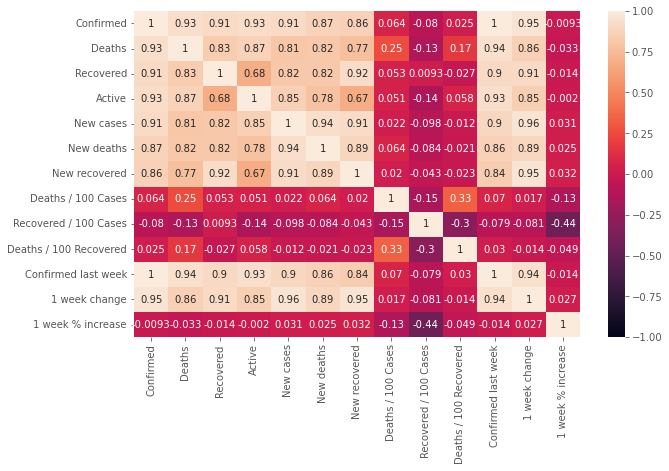

In [94]:
corr_data = covid_data.corr()
heatmap = sns.heatmap(corr_data, vmin=-1, vmax=1, annot=True)

## Visualize the data using PCA

In [95]:
X = scale(covid_data.values)
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

In [96]:
pca_X = pd.DataFrame(X_PCA)
pca_X = pca_X.rename(columns = {0:'PC1',
                                1:'PC2',
                                2:'PC3',
                                3:'PC4',
                                4:'PC5',
                                5:'PC6',
                                6:'PC7', 
                                7:'PC8', 
                                8:'PC9', 
                                9:'PC10', 
                                10:'PC11',
                                11:'PC12',
                                12:'PC13'})


pca_X.head()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.482753 -0.171260 -0.422401  0.062822  0.212912  0.121505  0.036731   
1 -0.607735  0.263986  0.294543  0.072546  0.208532  0.177099  0.015285   
2 -0.400737  0.136533 -0.012049  0.360380 -0.066886 -0.065948 -0.076029   
3 -0.680466 -0.351731 -1.002879  0.563513 -0.147852 -0.309462 -0.241707   
4 -0.591797  1.347719  0.830681  0.381078  0.567714  0.635631  0.190708   

        PC8       PC9      PC10      PC11          PC12          PC13  
0 -0.002926  0.054757  0.011289 -0.009697  1.407521e-15 -1.586938e-17  
1 -0.025646  0.005230  0.022124 -0.010725  2.896069e-17  1.760901e-17  
2 -0.131392 -0.021421  0.034291  0.035958  1.687180e-16  1.085037e-17  
3 -0.182049  0.045867  0.054797 -0.013045 -3.693647e-18  5.087549e-17  
4 -0.073985  0.055917  0.019605  0.000116  2.622938e-17  9.010834e-18  

[6.16977460e-01 1.23266130e-01 1.04685584e-01 5.10483068e-02
 3.79863875e-02 3.19526101e-02 1.99390336e-02 8.87849218e-03
 3.61606840e-03 1.30097169e-03 3.48956503e-04 8.96584902e-34
 5.63848278e-35]


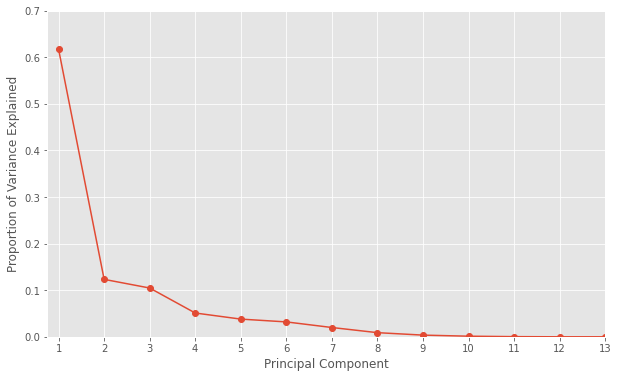

In [97]:
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')

plt.xlim(0.75,4.25)
plt.ylim(0,0.7)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.show()

Base on this graph, we know that it is best to use two principal components!

In [99]:
len(covid['Country/Region'].values)
# for i,name in enumerate(covid['Country/Region'].values):
#     print(i)
len(X_PCA[:, 10])

182

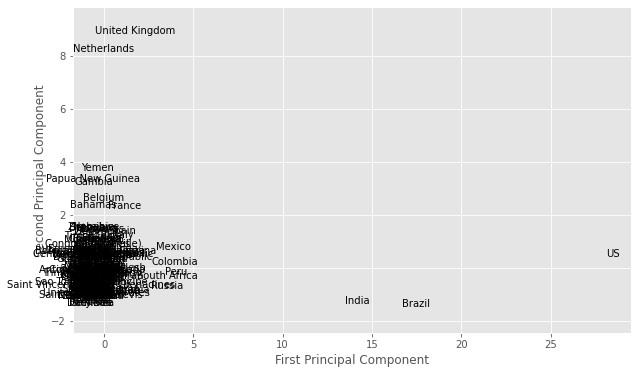

In [100]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

          
# Plot Principal Components 1 and Principal Components 2
for i,name in enumerate(covid['Country/Region'].values):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)   

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()